<a href="https://colab.research.google.com/github/Raulgmg1999/Challenge-Telecom-X/blob/main/Telecom_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes** #



Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## Extracción de datos ##

In [5]:

import pandas as pd
import requests
import numpy as np


url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'


response = requests.get(url)
data = response.json()
df_telecom = pd.DataFrame(data)
df_telecom.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


 Necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

## Transformación ##

Explorar las columnas del dataset y verificar sus tipos de datos.

Normalizar los datos

In [7]:
df_telecom = pd.json_normalize(data)
df_telecom.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [9]:
df_telecom.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [10]:
categorical_cols = df_telecom.select_dtypes(include='object').columns

categorical_cols

Index(['customerID', 'Churn', 'customer.gender', 'customer.Partner',
       'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')

In [11]:
from enum import unique
for col in categorical_cols:
  print(f'valores de {col}: {df_telecom[col].unique()}')

valores de customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
valores de Churn: ['No' 'Yes' '']
valores de customer.gender: ['Female' 'Male']
valores de customer.Partner: ['Yes' 'No']
valores de customer.Dependents: ['Yes' 'No']
valores de phone.PhoneService: ['Yes' 'No']
valores de phone.MultipleLines: ['No' 'Yes' 'No phone service']
valores de internet.InternetService: ['DSL' 'Fiber optic' 'No']
valores de internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
valores de internet.OnlineBackup: ['Yes' 'No' 'No internet service']
valores de internet.DeviceProtection: ['No' 'Yes' 'No internet service']
valores de internet.TechSupport: ['Yes' 'No' 'No internet service']
valores de internet.StreamingTV: ['Yes' 'No' 'No internet service']
valores de internet.StreamingMovies: ['No' 'Yes' 'No internet service']
valores de account.Contract: ['One year' 'Month-to-month' 'Two year']
valores de account.PaperlessBilling: ['Yes' 'No']
valores de a

existen datos vacios en Churn

In [12]:
df_telecom['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [13]:
df_telecom['Churn'] = df_telecom['Churn'].replace('', pd.NA)

Eliminamos registros vacios

In [14]:
df_telecom = df_telecom.dropna(subset=['Churn'])
df_telecom['Churn'].unique()

array(['No', 'Yes'], dtype=object)

acount charges debe ser float

In [15]:
df_telecom['account.Charges.Total'] = pd.to_numeric(df_telecom['account.Charges.Total'],errors='coerce')
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [16]:
df_telecom.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Para conocer donde hay valores nulos y cambiarlos

In [17]:
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Es necesario cambiar la información en acount charges

In [18]:
nulls = df_telecom[df_telecom['account.Charges.Total'].isnull()]

In [19]:
nulls['customer.tenure'].value_counts()

,count
customer.tenure,
0,11


In [20]:
df_telecom.loc[
    (df_telecom['account.Charges.Total'].isna()) & (df_telecom['customer.tenure'] == 0),
    'account.Charges.Total'
] = 0

In [21]:
df_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


Eliminamos espacios

In [22]:
categorical_cols = df_telecom.select_dtypes(include='object').columns
df_telecom[categorical_cols] = df_telecom[categorical_cols].apply(lambda x: x.str.strip())

df_telecom.sample(20)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
5441,7449-HVPIV,No,Male,0,Yes,Yes,55,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),90.40,5099.15
4176,5726-CVNYA,No,Female,0,Yes,Yes,8,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.60
5297,7240-ETPTR,Yes,Female,0,Yes,No,9,No,No phone service,DSL,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.75,442.20
2617,3647-GMGDH,Yes,Male,0,Yes,No,22,Yes,No,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.70,1914.90
6592,9065-ZCPQX,No,Male,0,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),78.85,5763.15
2527,3524-WQDSG,No,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),99.30,4209.95
4913,6718-BDGHG,No,Female,0,Yes,No,43,Yes,Yes,DSL,...,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),64.85,2908.20
4026,5510-BOIUJ,Yes,Male,0,No,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.25,19.25
4489,6158-DWPZT,Yes,Male,0,Yes,No,9,No,No phone service,DSL,...,No,No,No,No,No,One year,No,Bank transfer (automatic),24.10,259.80
5650,7717-BICXI,No,Male,0,Yes,Yes,60,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.55,1205.05


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [23]:
df_telecom['cuentas_diarias'] = df_telecom['account.Charges.Monthly']/30

df_telecom.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,3.015000


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [24]:
df_telecom['customer.Partner'] = df_telecom['customer.Partner'].map({'Yes': 1, 'No': 0})
df_telecom['customer.Dependents'] = df_telecom['customer.Dependents'].map({'Yes': 1, 'No': 0})
df_telecom['phone.PhoneService'] = df_telecom['phone.PhoneService'].map({'Yes': 1, 'No': 0})
df_telecom['phone.MultipleLines'] = df_telecom['phone.MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
df_telecom['internet.OnlineSecurity'] = df_telecom['internet.OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['internet.OnlineBackup'] = df_telecom['internet.OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['internet.DeviceProtection'] = df_telecom['internet.DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['internet.TechSupport'] = df_telecom['internet.TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['internet.StreamingTV'] = df_telecom['internet.StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['internet.StreamingMovies'] = df_telecom['internet.StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df_telecom['account.PaperlessBilling'] = df_telecom['account.PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [25]:
df_telecom = df_telecom.rename(columns={
    'customerID': 'customer_id',
    'Churn': 'churn',
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'senior_citizen',
    'customer.Partner': 'partner',
    'customer.Dependents': 'dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'phone_service',
    'phone.MultipleLines': 'multiple_lines',
    'internet.InternetService': 'internet_service',
    'internet.OnlineSecurity': 'online_security',
    'internet.OnlineBackup': 'online_backup',
    'internet.DeviceProtection': 'device_protection',
    'internet.TechSupport': 'tech_support',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_movies',
    'account.Contract': 'contract',
    'account.PaperlessBilling': 'paperless_billing',
    'account.PaymentMethod': 'payment_method',
    'account.Charges.Monthly': 'monthly_charges',
    'account.Charges.Total': 'total_charges'
})


In [26]:
df_telecom.sample(10)

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cuentas_diarias
6528,8974-OVACP,No,Female,0,0,0,1,1,0,No,...,0,0,0,0,Month-to-month,0,Mailed check,20.15,20.15,0.671667
1571,2237-ZFSMY,Yes,Female,0,0,0,39,1,0,Fiber optic,...,1,1,1,0,One year,1,Electronic check,95.55,3692.85,3.185000
235,0356-ERHVT,No,Male,0,1,0,11,1,0,DSL,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),45.90,521.90,1.530000
3888,5318-IXUZF,Yes,Female,0,0,0,2,1,0,Fiber optic,...,0,0,1,0,Month-to-month,1,Bank transfer (automatic),87.15,183.75,2.905000
3146,4385-ZKVNW,No,Male,0,1,1,44,1,0,DSL,...,0,1,0,0,Month-to-month,1,Bank transfer (automatic),54.90,2549.10,1.830000
450,0637-YLETY,Yes,Female,0,0,0,16,1,1,Fiber optic,...,1,0,0,1,Month-to-month,1,Credit card (automatic),95.60,1555.65,3.186667
3382,4695-VADHF,Yes,Male,0,1,1,18,1,0,DSL,...,1,0,0,1,Month-to-month,0,Electronic check,57.45,990.85,1.915000
6763,9330-IJWIO,Yes,Female,0,0,0,13,1,1,Fiber optic,...,0,0,1,1,Month-to-month,1,Electronic check,100.35,1358.85,3.345000
3604,4962-CHQPW,No,Male,0,0,1,29,1,0,No,...,0,0,0,0,One year,0,Mailed check,19.85,535.05,0.661667
981,1379-FRVEB,No,Male,0,0,1,15,1,1,Fiber optic,...,0,0,1,0,Month-to-month,1,Electronic check,91.00,1430.05,3.033333


## Carga y análisis ##

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [27]:
df_telecom.describe()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


Al tener 0 y 1 en las variables, no arroja esto, pr lo que no es importante, así que relizaremos el analisis de los siguentes datos

In [28]:
df_telecom[['tenure', 'monthly_charges', 'total_charges']].describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Para el caso de los string

In [29]:
categorical = df_telecom.select_dtypes(include='object')
categorical.describe()


,customer_id,churn,gender,internet_service,contract,payment_method
count,7043,7043,7043,7043,7043,7043
unique,7043,2,2,3,3,4
top,9995-HOTOH,No,Male,Fiber optic,Month-to-month,Electronic check
freq,1,5174,3555,3096,3875,2365


Lo que nos describe el total de datos, cuantos datos hay digamos opciones , cual es la que más se repite y con que frecuencia se repite, entonces id hay uno para cada cliente , son más hombres 5174 , 3096 con fibra optica, 3875 pago mes a mes y 2365 pagan de manera electronica

### Distribución de evasión ###

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [30]:
churn_counts = df_telecom['churn'].value_counts()
churn_percent = df_telecom['churn'].value_counts(normalize=True) * 100

churn_counts, churn_percent


(churn
 No     5174
 Yes    1869
 Name: count, dtype: int64,
 churn
 No     73.463013
 Yes    26.536987
 Name: proportion, dtype: float64)

/tmp/ipython-input-65172/1046484338.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cool_colors_map = cm.get_cmap('cool')


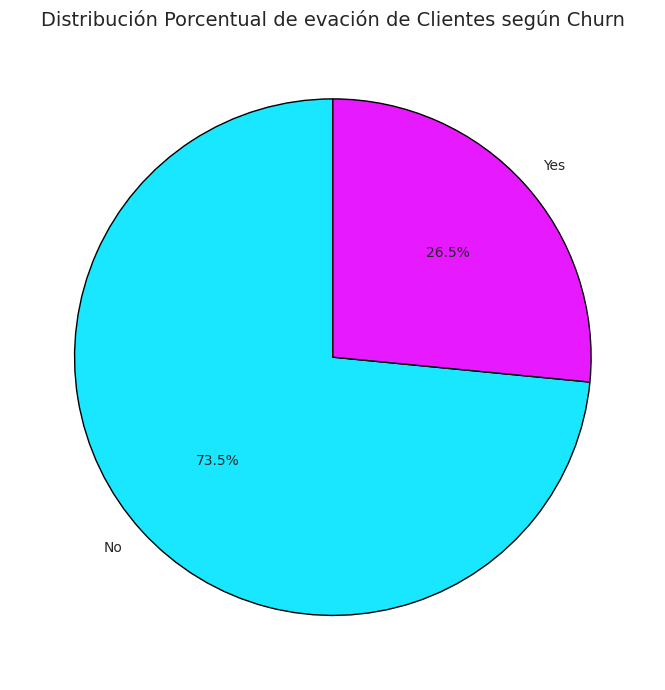

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))

cool_colors_map = cm.get_cmap('cool')
color_no_churn = cool_colors_map(0.1)
color_yes_churn = cool_colors_map(0.9)

pie_colors = [color_no_churn if cat == 'No' else color_yes_churn
              for cat in churn_percent.index]

plt.pie(
    churn_percent,
    labels=churn_percent.index,
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribución Porcentual de evación de Clientes según Churn', fontsize=14)
plt.tight_layout()
plt.show()

###  Recuento de evasión por variables categóricas ###

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [33]:

df_telecom['contract'].value_counts(normalize=True) * 100


,proportion
contract,
Month-to-month,55.019168
Two year,24.066449
One year,20.914383


In [34]:
contract_churn = pd.crosstab(df_telecom['contract'], df_telecom['churn'], normalize='index') * 100

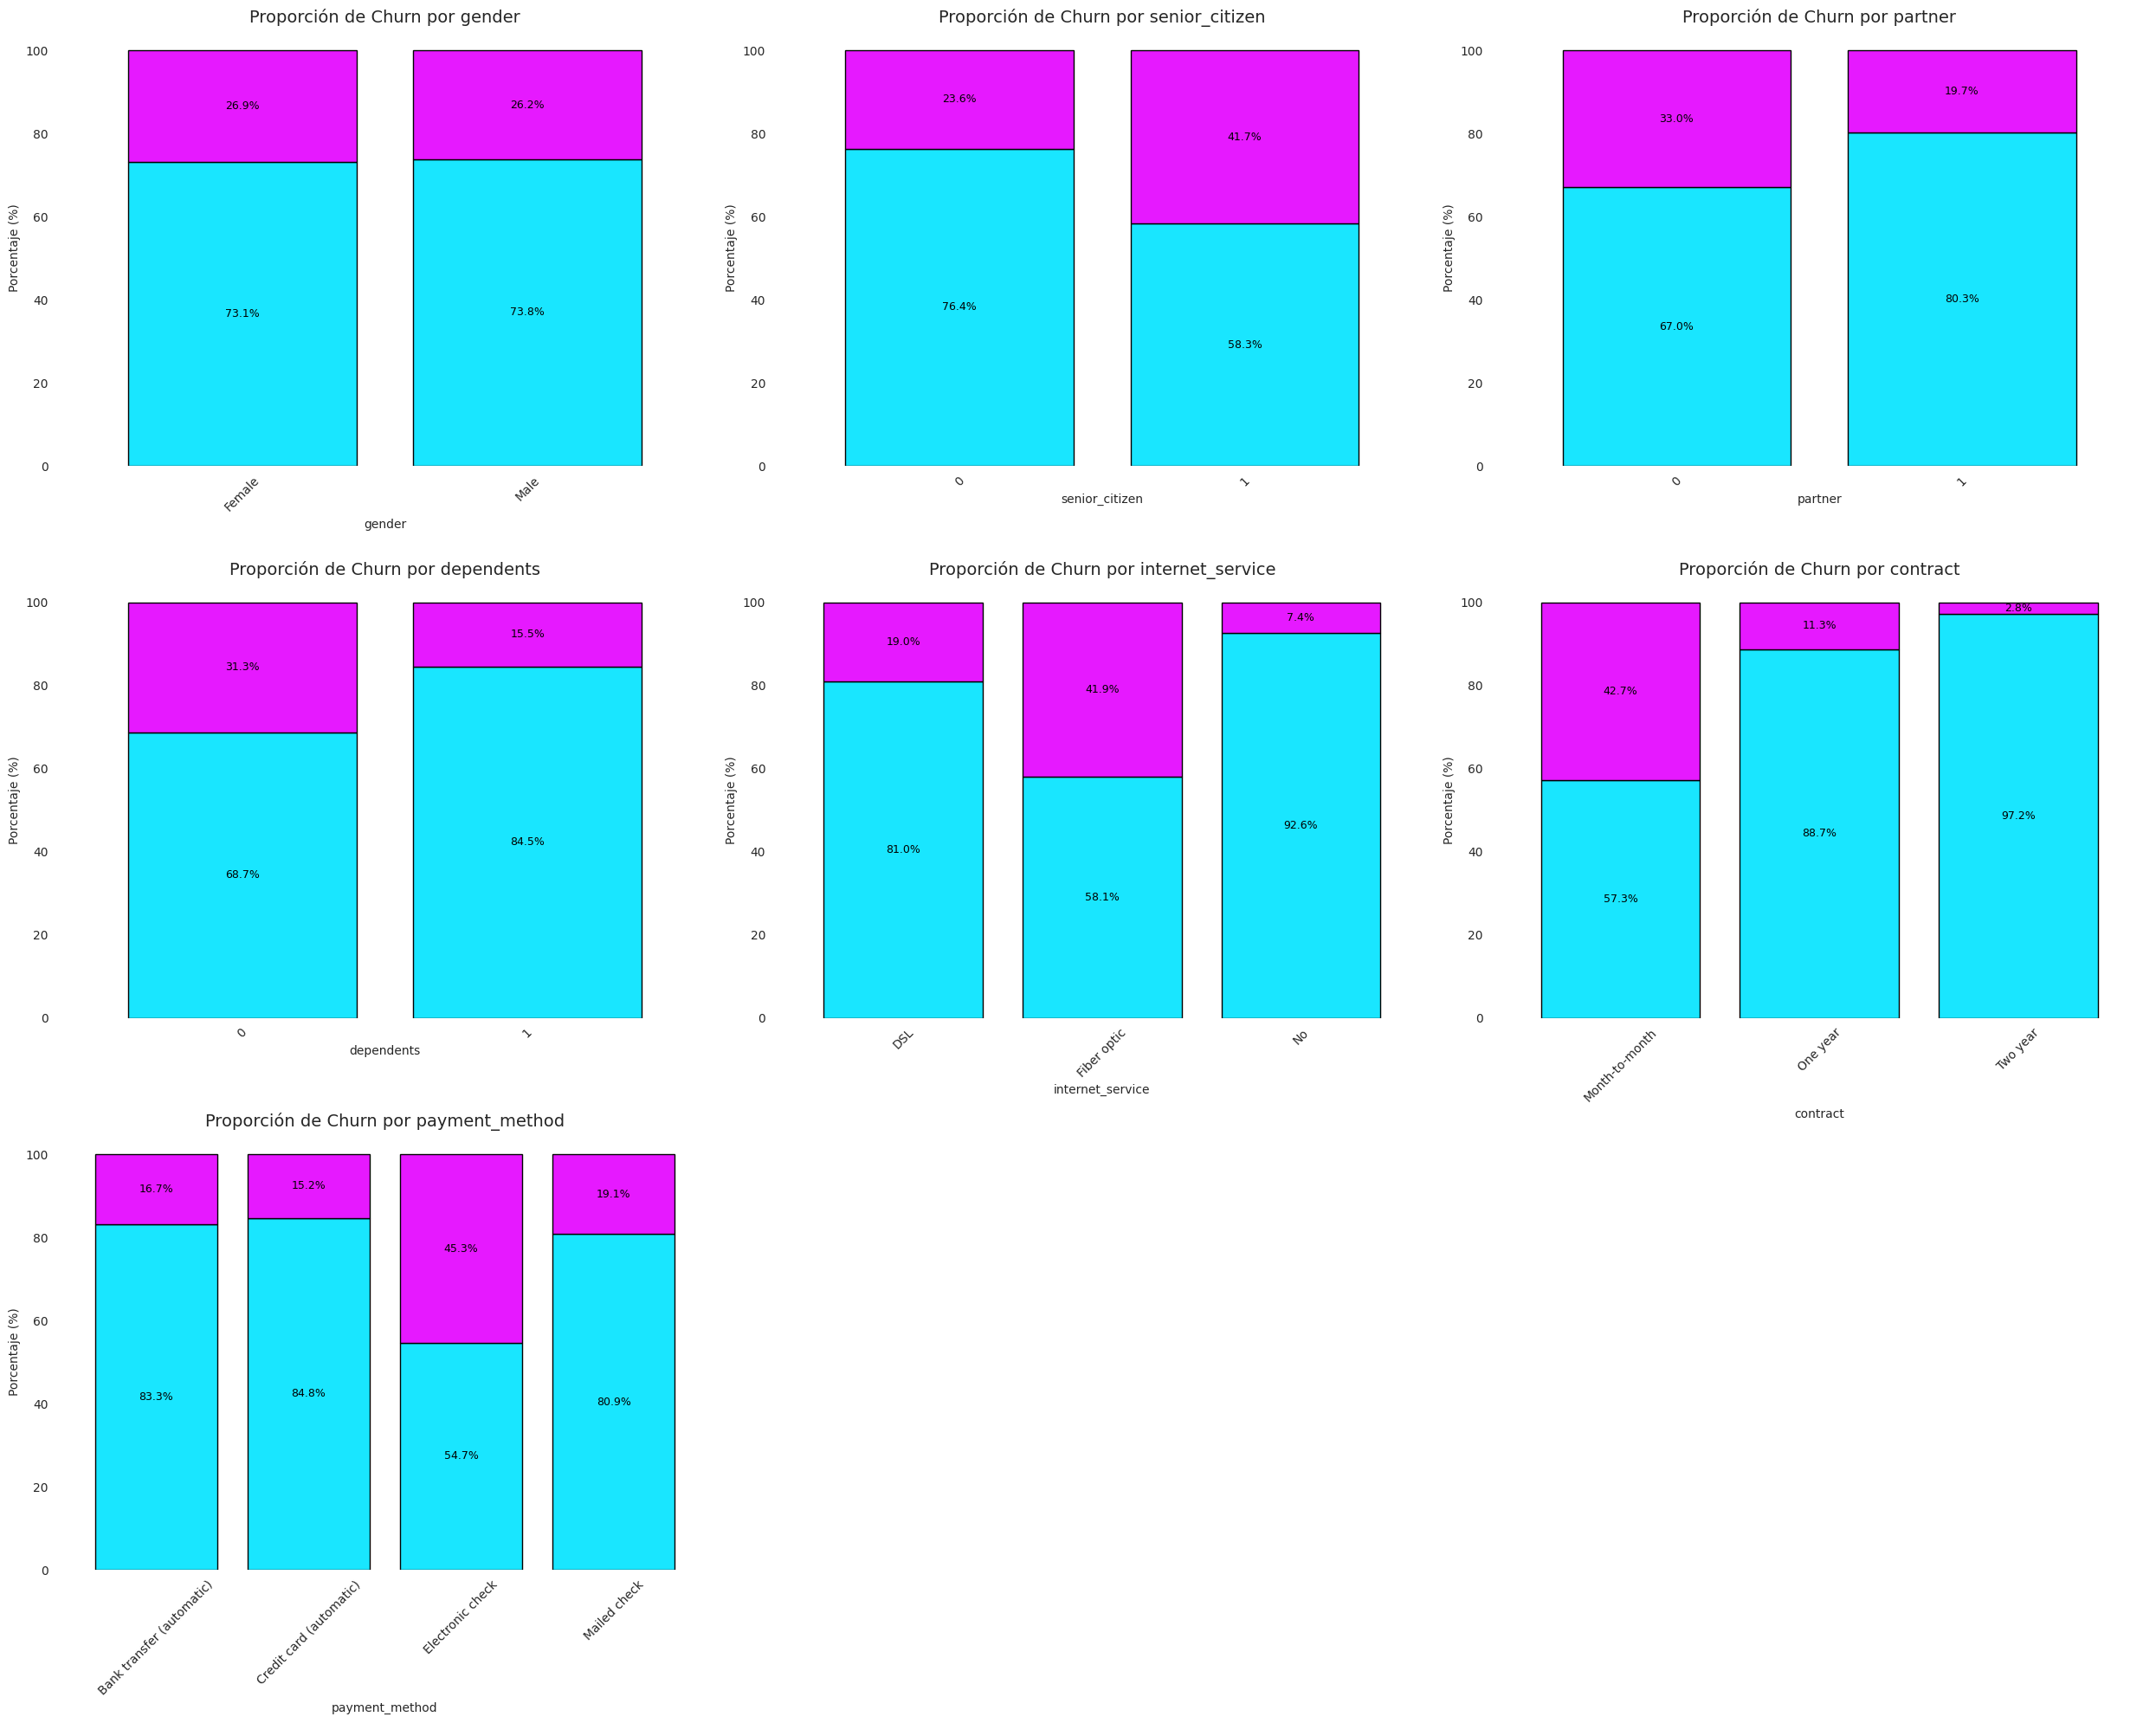

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import matplotlib

variables_categoricas = [
    'gender',
    'senior_citizen',
    'partner',
    'dependents',
    'internet_service',
    'contract',
    'payment_method'
]

sns.set_style('white')
fig = plt.figure(figsize=(25,20))

# Obtener dos colores distintivos del colormap 'cool' para 'No' y 'Yes' churn
cool_colors_map = matplotlib.colormaps.get_cmap('cool')
color_no_churn = cool_colors_map(0.1)
color_yes_churn = cool_colors_map(0.9)

# Asignar los colores directamente a los contenedores de las barras
bar_colors = [color_no_churn, color_yes_churn]

for i, var in enumerate(variables_categoricas):

    ax = fig.add_subplot(3,3,i+1)

    tabla = pd.crosstab(df_telecom[var], df_telecom['churn'], normalize='index') * 100

    tabla.plot(
        kind='bar',
        stacked=True,
        color=bar_colors,
        width=0.8,
        edgecolor='black',
        ax=ax
    ) # <--- Aquí faltaba el paréntesis de cierre

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.set_title(f'Proporción de Churn por {var}', fontsize=14)
    ax.set_ylabel('Porcentaje (%)')
    ax.set_xlabel(var)
    ax.tick_params(axis='x', rotation=45)

    # Etiquetas centradas
    for c in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='black')

    if ax.legend_ is not None:
        ax.legend().remove()

plt.tight_layout()
plt.show()

### Conteo de evasión por variables numéricas ###

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [36]:
df_telecom.groupby('churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [60]:
variables_numericas = [
    'tenure',
    'monthly_charges',
    'total_charges',
    'cuentas_diarias'
]

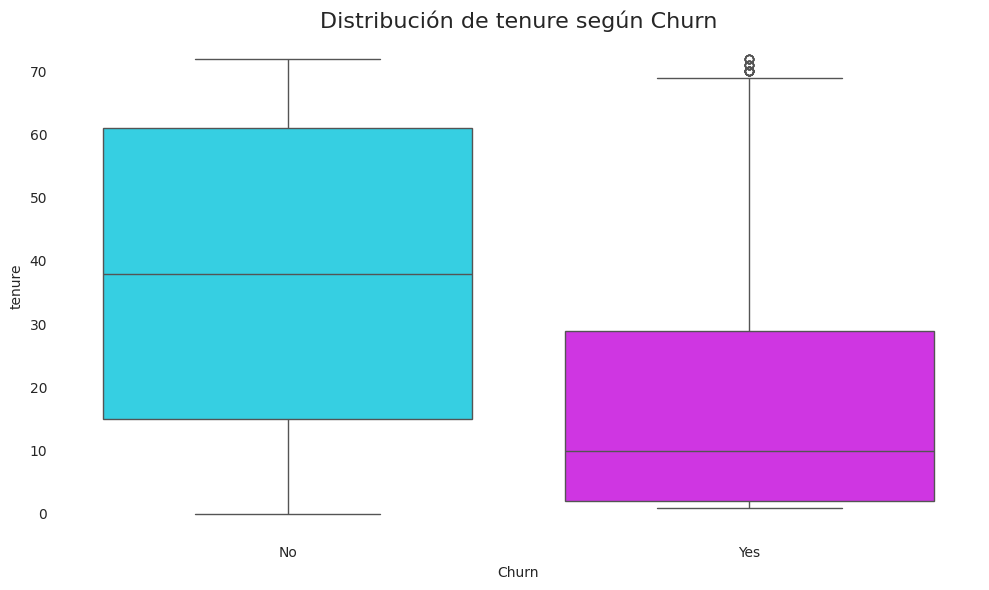

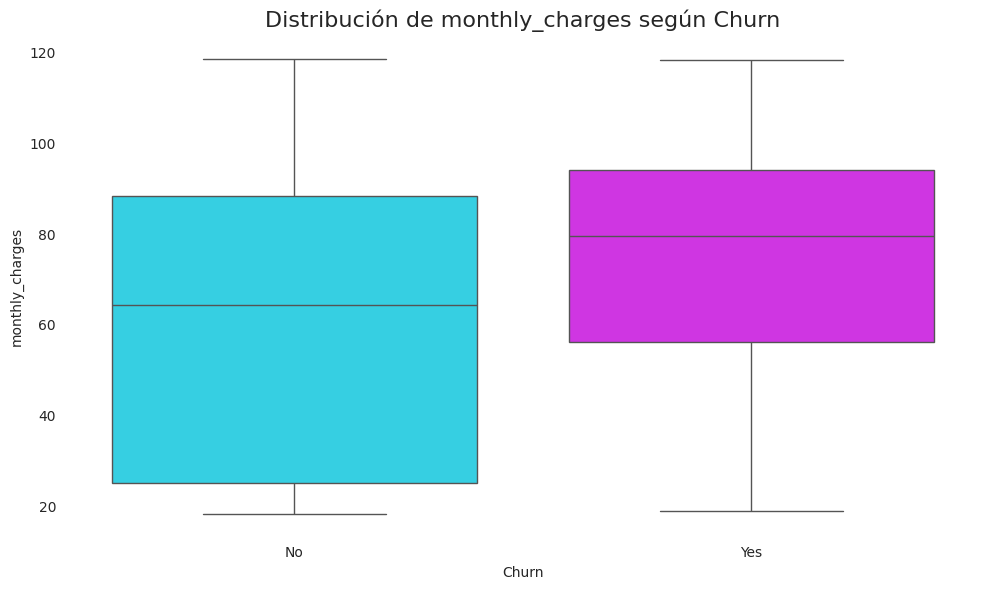

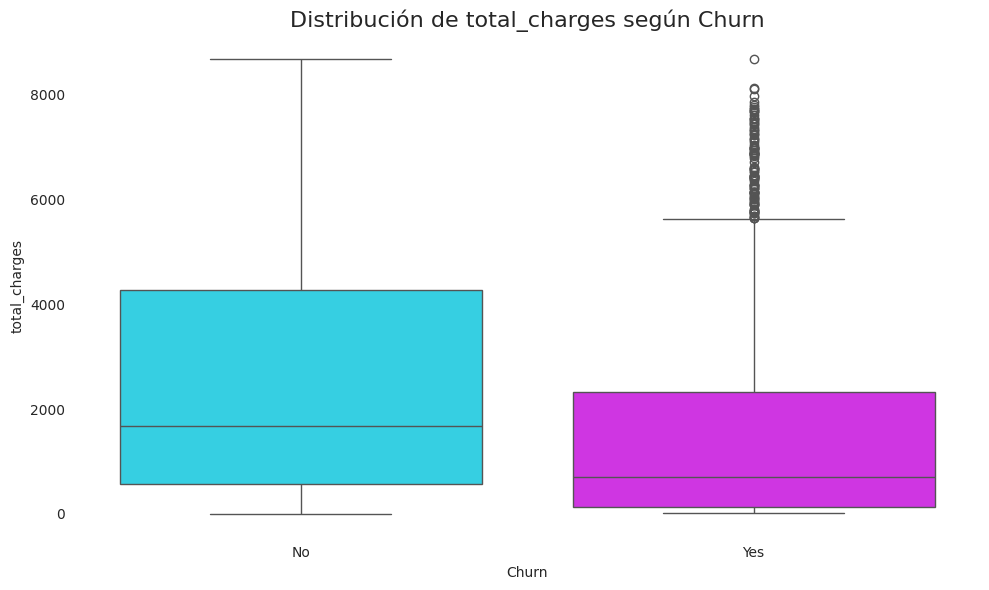

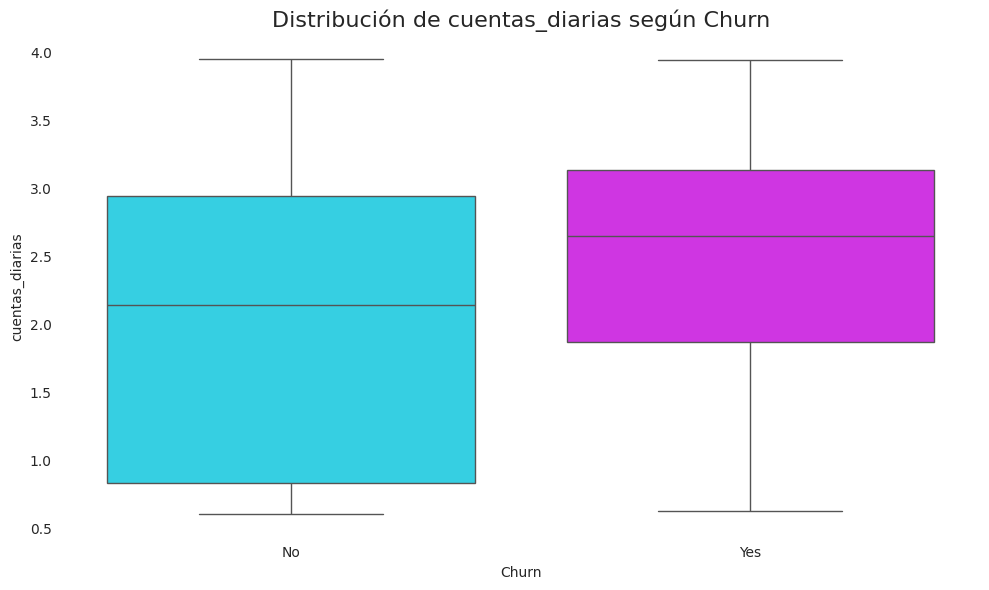

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib

sns.set_style('white')




cool_colors_map = matplotlib.colormaps.get_cmap('cool')
color_no_churn = cool_colors_map(0.1)
color_yes_churn = cool_colors_map(0.9)


churn_palette = {'No': color_no_churn, 'Yes': color_yes_churn}

for var in variables_numericas:

    plt.figure(figsize=(10,6))

    ax = sns.boxplot(
        data=df_telecom,
        x='churn',
        y=var,
        palette=churn_palette,
        hue='churn',
        legend=False
    )

    # Quitar bordes
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(f'Distribución de {var} según Churn', fontsize=16)
    plt.xlabel('Churn')
    plt.ylabel(var)

    plt.tight_layout()
    plt.show()

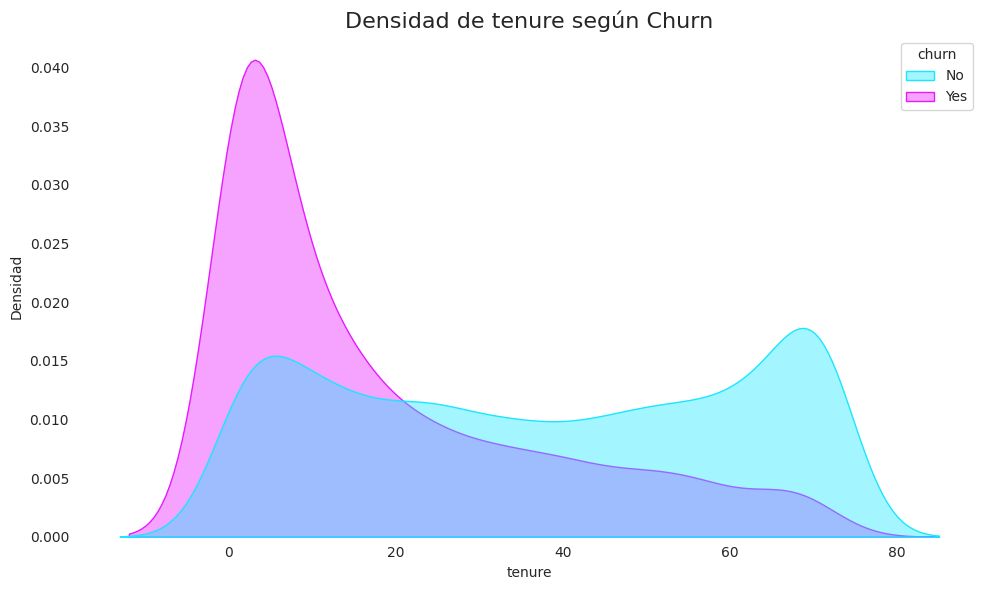

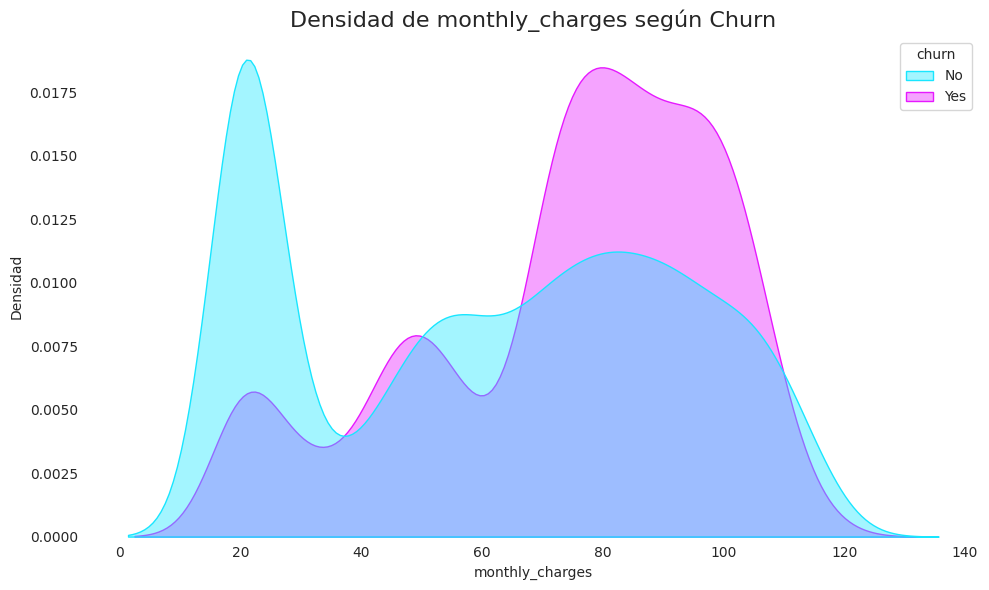

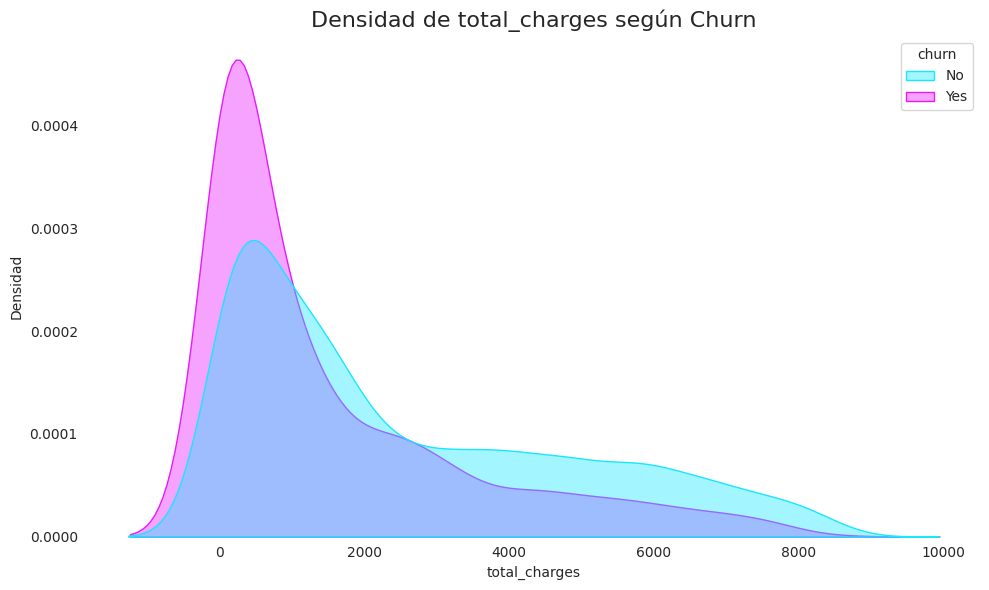

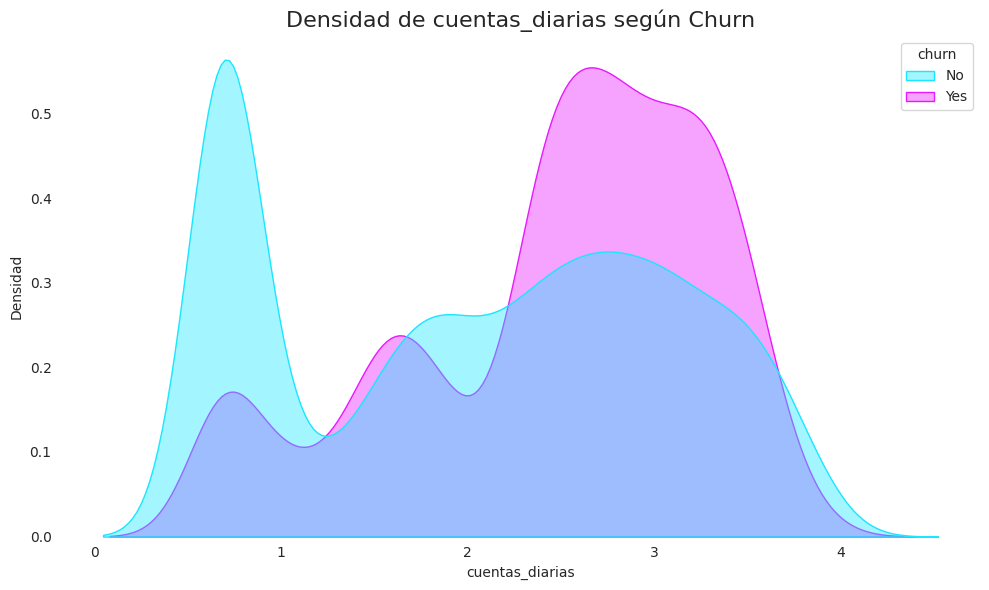

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib

cool_colors_map = matplotlib.colormaps.get_cmap('cool')
color_no_churn = cool_colors_map(0.1)
color_yes_churn = cool_colors_map(0.9)


churn_palette = {'No': color_no_churn, 'Yes': color_yes_churn}

for var in variables_numericas:

    plt.figure(figsize=(10,6))

    sns.kdeplot(
        data=df_telecom,
        x=var,
        hue='churn',
        fill=True,
        palette=churn_palette,
        alpha=0.4,
        common_norm=False
    )

    # Quitar bordes
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(f'Densidad de {var} según Churn', fontsize=16)
    plt.xlabel(var)
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

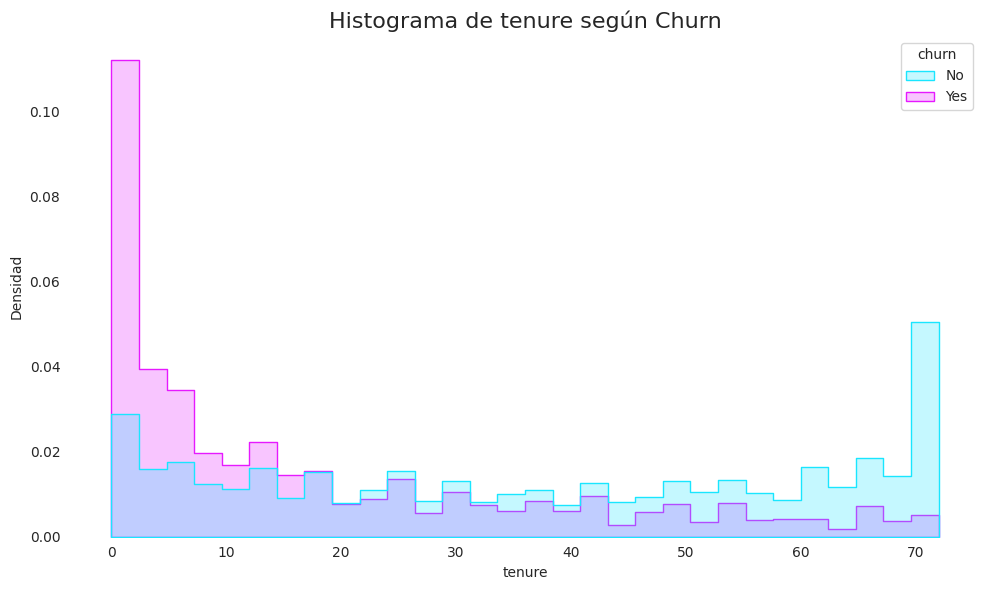

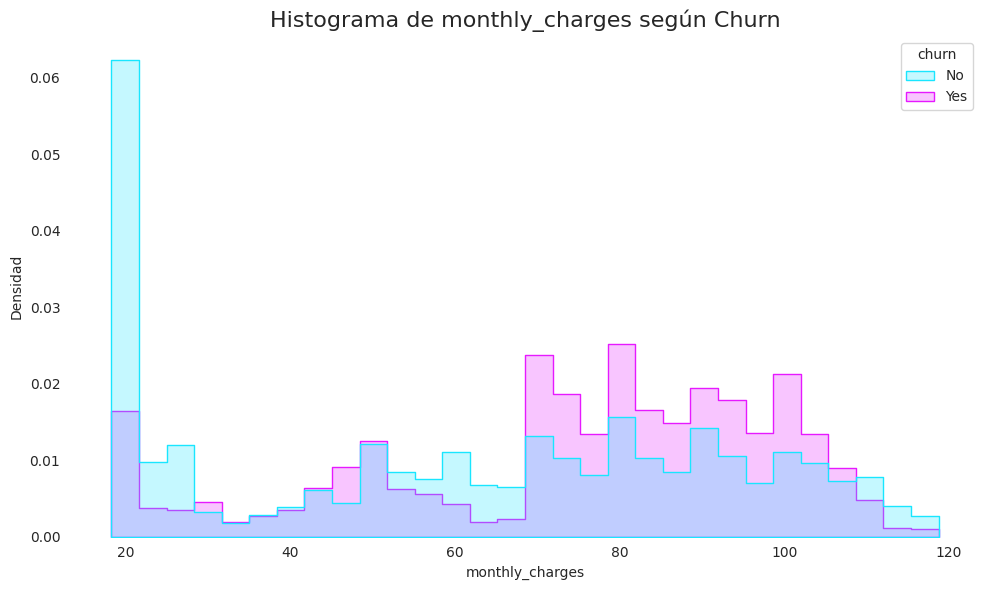

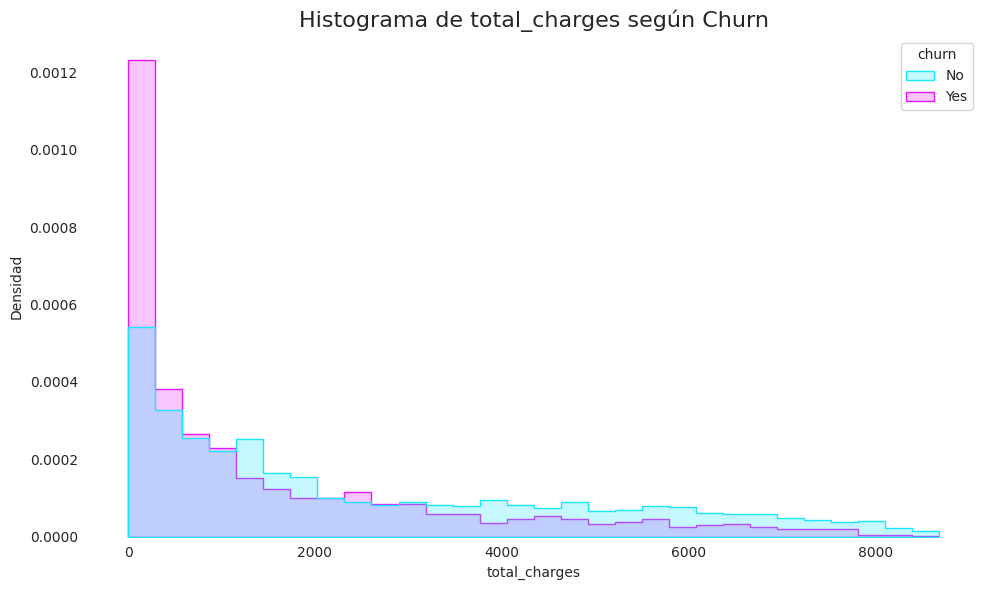

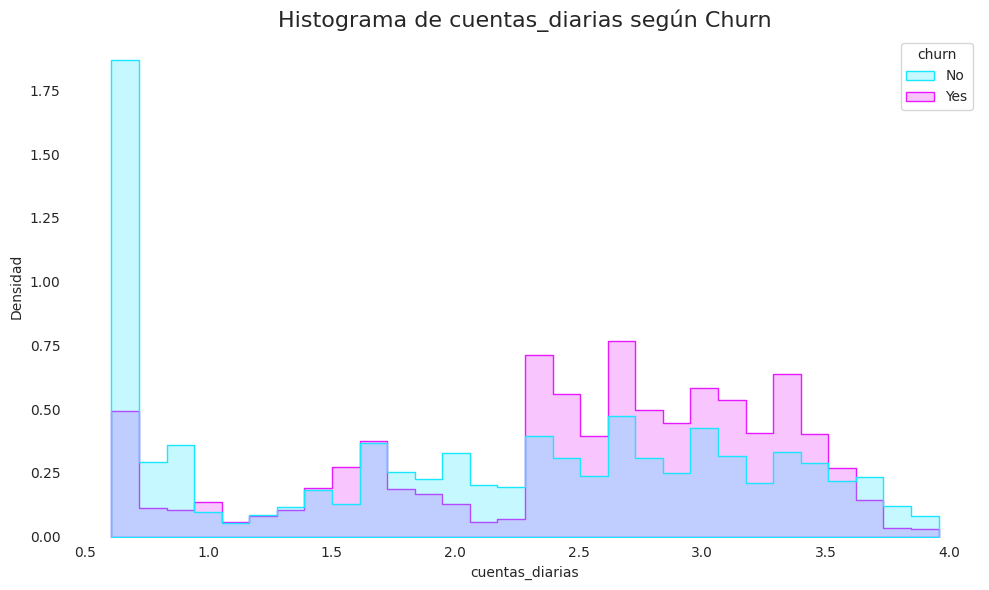

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib


cool_colors_map = matplotlib.colormaps.get_cmap('cool')
color_no_churn = cool_colors_map(0.1)
color_yes_churn = cool_colors_map(0.9)
churn_palette = {'No': color_no_churn, 'Yes': color_yes_churn}

for var in variables_numericas:

    plt.figure(figsize=(10,6))

    sns.histplot(
        data=df_telecom,
        x=var,
        hue='churn',
        bins=30,
        palette=churn_palette,
        element='step',
        stat='density',
        common_norm=False
    )

    # Quitar bordes
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.title(f'Histograma de {var} según Churn', fontsize=16)
    plt.xlabel(var)
    plt.ylabel('Densidad')

    plt.tight_layout()
    plt.show()

# Informe Final — Análisis de Evasión de Clientes en Telecom X

## 1. Introducción

El propósito de este análisis es entender el problema de evasión de clientes (churn) en Telecom X y detectar los factores que influyen en que un cliente decida cancelar el servicio.

La evasión representa una pérdida directa de ingresos y puede afectar la estabilidad financiera de la empresa. Por ello, resulta fundamental identificar patrones de comportamiento y variables que estén relacionadas con la probabilidad de abandono. A partir de este análisis se busca generar información útil que apoye la toma de decisiones estratégicas para reducir el churn.

---

## 2. Limpieza y Tratamiento de Datos

### 2.1 Exploración inicial

Se realizó la carga del dataset y una revisión general de su estructura utilizando funciones como `head()`, `info()` y `describe()`. Esto permitió conocer el tipo de variables, detectar posibles valores nulos y entender cómo estaban distribuidos los datos.

---

### 2.2 Manejo de valores nulos e inconsistencias

Durante la limpieza se identificaron columnas con valores faltantes y registros con posibles inconsistencias. Se realizaron los siguientes ajustes:

- Conversión de columnas al tipo de dato adecuado (por ejemplo, cargos totales a formato numérico).
- Eliminación o tratamiento de valores nulos.
- Revisión de registros duplicados.
- Estandarización de variables categóricas para asegurar coherencia en los valores.

Estos pasos fueron necesarios para garantizar que el análisis posterior se realizara sobre datos confiables.

---

### 2.3 Transformación de variables

Se prepararon las variables para facilitar el análisis:

- Codificación de variables categóricas cuando fue necesario.
- Creación de variables binarias para representar la evasión.
- Revisión de posibles valores atípicos en variables numéricas.

Con esto, el dataset quedó listo para el análisis exploratorio.

---

## 3. Análisis Exploratorio de Datos

El análisis exploratorio permitió identificar patrones relevantes relacionados con la evasión de clientes.

### 3.1 Distribución del churn

Se analizó la proporción de clientes que abandonaron el servicio frente a los que permanecen. Esto permitió dimensionar el problema y entender el peso que tiene el churn dentro del total de clientes.

---

### 3.2 Variables categóricas

Se evaluó la relación entre churn y variables como:

- Tipo de contrato
- Método de pago
- Servicios adicionales contratados
- Tipo de servicio de internet

Se observó que los clientes con contratos mensuales presentan mayor tasa de abandono en comparación con aquellos que tienen contratos a largo plazo. Además, ciertos métodos de pago y combinaciones de servicios muestran diferencias claras en el comportamiento de evasión.

---

### 3.3 Variables numéricas

Se analizaron variables como la antigüedad del cliente (tenure), los cargos mensuales y los cargos totales acumulados.

Los principales hallazgos fueron:

- Los clientes con menor antigüedad presentan mayor probabilidad de abandono.
- Cargos mensuales más elevados se asocian con mayor tasa de churn.
- Los clientes con mayor permanencia tienden a mantenerse más estables.

---

### 3.4 Correlaciones

Se utilizó una matriz de correlación para identificar relaciones entre variables numéricas y la variable objetivo. Esto permitió confirmar qué factores están más relacionados con la evasión y cuáles tienen menor impacto.

---

## 4. Conclusiones e Insights

A partir del análisis realizado se pueden destacar los siguientes puntos:

- El tipo de contrato es uno de los factores más determinantes en la evasión.
- La baja antigüedad es un indicador claro de riesgo.
- Los clientes con cargos mensuales altos muestran mayor tendencia a cancelar.
- Los contratos a largo plazo están asociados con mayor fidelización.

Estos resultados permiten identificar segmentos de clientes con mayor riesgo de abandono y facilitan la creación de estrategias de retención más específicas.

---

## 5. Recomendaciones

Con base en los hallazgos obtenidos, se proponen las siguientes acciones:

1. Promover contratos a largo plazo mediante incentivos o descuentos.
2. Implementar estrategias de seguimiento durante los primeros meses del cliente.
3. Revisar planes con cargos elevados para ofrecer alternativas más competitivas.
4. Diseñar programas de fidelización para clientes con mayor permanencia.

---

## Conclusión

El análisis permitió identificar patrones claros en el comportamiento de los clientes y factores asociados a la evasión. La información obtenida puede utilizarse para desarrollar estrategias enfocadas en reducir el churn y mejorar la retención.

Trabajar con datos permite tomar decisiones más fundamentadas y orientar los esfuerzos de la empresa hacia los segmentos con mayor riesgo.

## Extra ##

In [71]:
vars_numericas = [
    'churn',
    'tenure',
    'monthly_charges',
    'total_charges',
    'senior_citizen',
    'partner',
    'dependents',
    'phone_service',
    'multiple_lines',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'paperless_billing'
]


df_corr_temp = df_telecom[vars_numericas].copy()


df_corr_temp['churn'] = df_corr_temp['churn'].map({'Yes': 1, 'No': 0})

df_corr = df_corr_temp

In [72]:
corr_matrix = df_corr.corr()

corr_matrix['churn'].sort_values(ascending=False)

,churn
churn,1.000000
monthly_charges,0.193356
paperless_billing,0.191825
senior_citizen,0.150889
streaming_tv,0.063228
streaming_movies,0.061382
multiple_lines,0.040102
phone_service,0.011942
partner,-0.150448
dependents,-0.164221


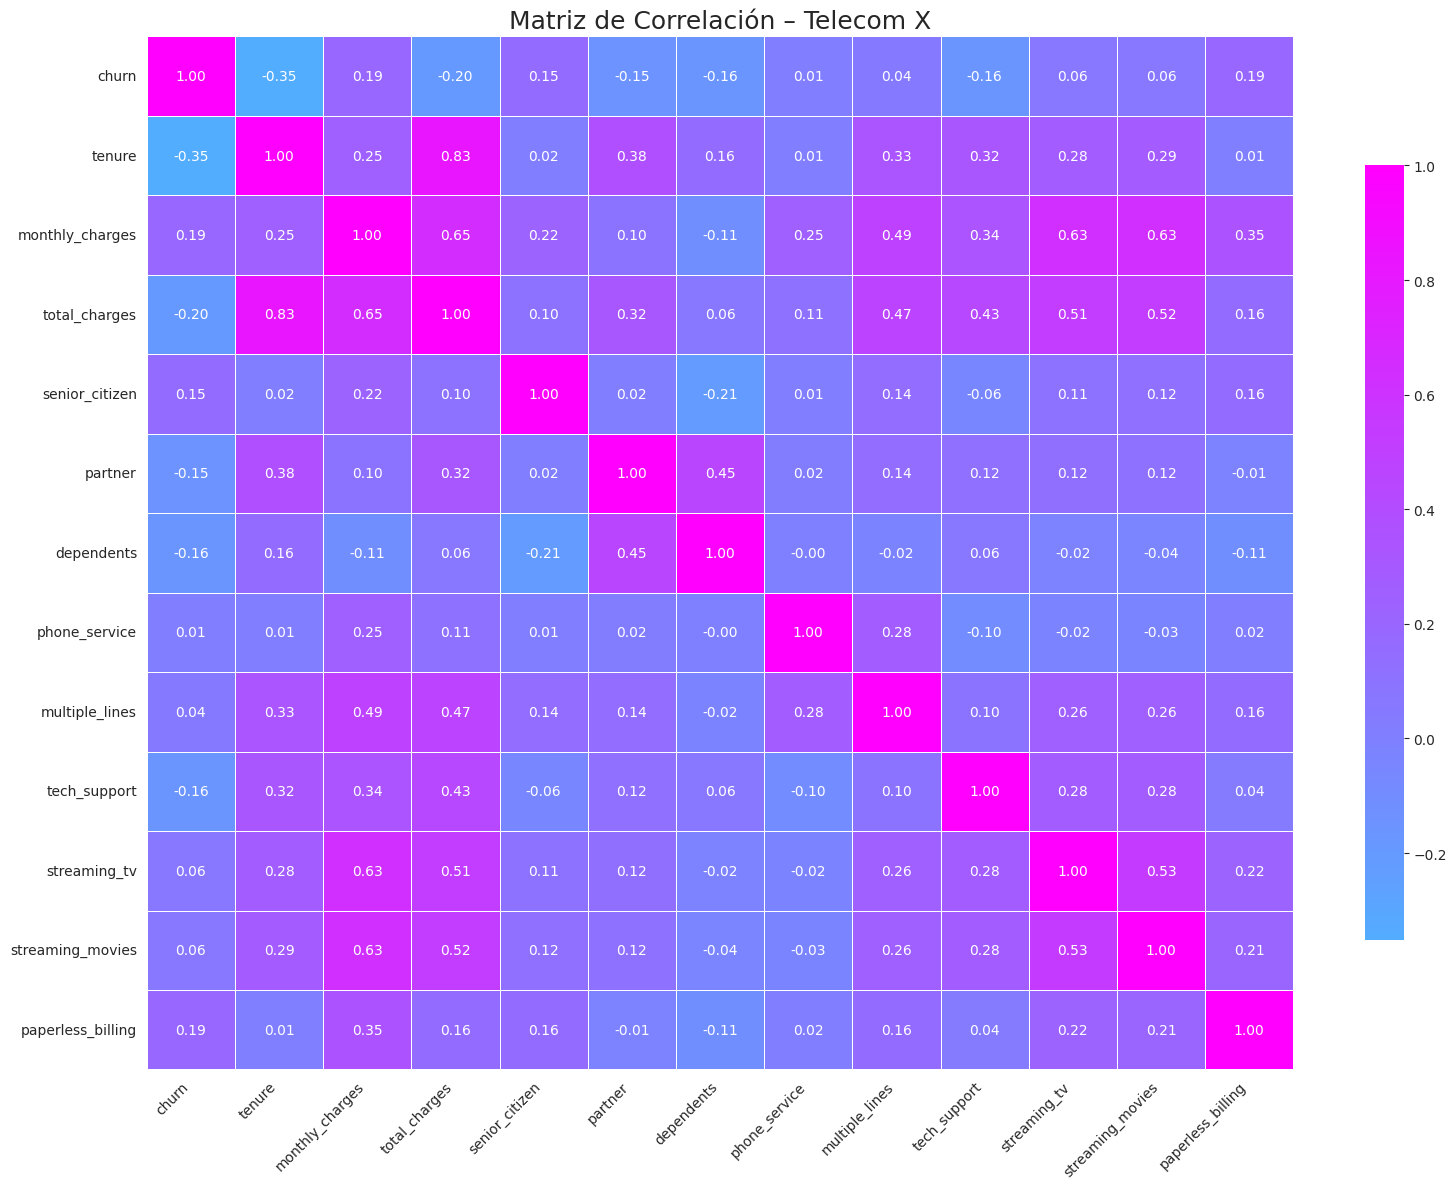

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap='cool',
    center=0,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'shrink': .75}
)

plt.title('Matriz de Correlación – Telecom X', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()